In [1]:
#Setup
import numpy as np
from pylab import *
from scipy import interpolate
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import configparser
import codecs
import json
import csv

#from scipy.interpolate import BSpline
#import scipy.optimize as opt
#import scipy.fftpack
#from scipy import signal
#from scipy import integrate
#from scipy import stats
#import matplotlib as mpl
#from matplotlib.colors import LogNorm

mpl.rcParams['agg.path.chunksize'] = 100000

In [2]:
#Setup (Visual)
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (25,20)
plt.rcParams['figure.facecolor'] = 'white'

### SETTINGS

In [3]:
#csv data for test result
def csv_df(data):
    return pd.read_csv('./Data/' + data  +'.csv', skiprows=1, names=["WC","PRC"])

#text data (Option)
def test_data(data):   
    return pd.read_table('./Data/' + data+'.txt', skiprows=1, header=0,index_col=False)

#map data in .txt form
def map_array(cmap):   
    return pd.read_table('./Data/' + cmap +'.txt', skiprows=9, header=0, names=["NC","WC","PRC","ETAC"])


def all_datas_plot(cmap,data1,data2,color1,color2,xlim,ylmin,ylmax):
    df=cmap
    datax1=data1['WC']
    datay1=data1['PRC']
    datax2=data2['WC']
    datay2=data2['PRC']
    df['spdline']=df.groupby('NC').ngroup()
    rpmgrp=df.groupby('spdline')
    nmax=rpmgrp.ngroups
    surgelinex=list()
    surgeliney=list()
    chokelinex=list()
    chokeliney=list()
      
    #plot setting
    plt.figure(0)
    plt.title("Compressor Map_"  + cmapname + '_' + name1 + '_' + name2)
    plt.xlabel('Air Flow [kg/s]')
    plt.ylabel('PRC [-]')
    plt.axis ([0,xlim,ylmin,ylmax])
    plt.xticks(np.arange(0, xlim, xlim/20))
    plt.yticks(np.arange(ylmin, ylmax, (ylmax-ylmin)/20))
    
    plt.figure(1)
    plt.title("Flow-EtaC_"  + cmapname + '_' + name1 + '_' + name2)
    plt.xlabel('Air Flow [kg/s]')
    plt.ylabel('EtaC [-]')
    plt.axis ([0,xlim,0.5,0.8])
    plt.xticks(np.arange(0, xlim, xlim/20))
    plt.yticks(np.arange(0.5, 0.8, 0.3/20))
    
    plt.figure(2)
    plt.title("Flow-PRC_"  + cmapname + '_' + name1 + '_' + name2)
    plt.xlabel('Air Flow [kg/s]')
    plt.ylabel('PRC [-]')
    plt.axis ([0,xlim,ylmin,ylmax])
    plt.xticks(np.arange(0, xlim, xlim/20))
    plt.yticks(np.arange(ylmin, ylmax, (ylmax-ylmin)/20))  

    #plot efficiency contour
    """
    j=0
    while j<nmax:
        rpmj=rpmgrp.get_group(j)
        x=rpmj['WC']
        y=rpmj['PRC']
        z=rpmj['ETAC']
        n=20
        xj, yj = np.linspace(x.min(), x.max(), n), np.linspace(y.min(), y.max(), n)
        Xj,Yj=np.meshgrid(xj,yj)
        Zj = interpolate.griddata((x,y),z,(Xj,Yj),method='linear')

        plt.figure(0)
        plt.contour(Xj,Yj,Zj, 2 ,colors='slategrey')
        #plt.contourf(X,Y,Z, 7 ,cmap='bwr',alpha=0.3)              
        j+=1   
    
    """
    plt.figure(0)
    x=df['WC']
    y=df['PRC']
    z=df['ETAC']
    n=11
    xi, yi = np.linspace(x.min(), x.max(), n), np.linspace(y.min(), y.max(), n)
    zi =  gaussian_filter1d(z, sigma=2)
    Y,X=np.meshgrid(yi,xi)
    Z1 = interpolate.griddata((y,x),z,(Y,X),method='cubic')
    Z2 = interpolate.griddata((y,x),zi,(Y,X),method='cubic')  #with gaussian filter
    plt.contourf(X,Y,Z1, 14 ,cmap='bwr',alpha=0.3)
    #plt.contourf(X,Y,Z2, 14 ,cmap='bwr',alpha=0.4)
    #plt.imshow(Z1, extent=[x.min(),x.max(),y.min(),y.max()], origin='lower' ,cmap='bwr', aspect=0.1)
    plt.colorbar()
    plt.contour(X,Y,Z1, 7 ,colors='slategrey')
  

    #Plot speedlines
    i=0
    while i<nmax:
        rpmi=rpmgrp.get_group(i)
        wci=rpmi['WC']
        prci=rpmi['PRC']
        chokelinex.append(wci.max())
        chokeliney.append(prci.min())
        surgelinex.append(wci.min())
        surgeliney.append(prci.max())
        revi=str(int(rpmi['NC'].iloc[0]))
        plt.figure(0)
        plt.plot(wci, prci,"midnightblue", label=revi + ' rpm', linewidth=1)   
        
        #plt EtaC
        plt.figure(1)
        plt.plot(wci,rpmi['ETAC'],"red", label=revi+'rpm(Flow-EtaC)')
                
        #plt PRC
        plt.figure(2)
        plt.plot(wci,prci,"blue", label=revi+'rpm(Flow-PRC)')
                
        i+=1   
        
    #Surge line and choke line
    plt.figure(0)
    plt.plot(surgelinex, surgeliney,"midnightblue", label = 'GS Surgeline', linewidth=4)
    plt.plot(chokelinex, chokeliney,"midnightblue", label = 'GS Chokeline', linewidth=4)   
    
    #plot datas
    plt.plot(datax1, datay1,color1, label = name1, linewidth=1)
    plt.plot(datax2, datay2,color2, label = name2, linewidth=1)
    plt.legend()
    plt.savefig('./Data/CMaP' + cmapname + '_' + name1 + '_' + name2 + '.png', dpi=300)
    
    plt.figure(1)
    plt.legend
    plt.savefig('./Data/EtaC' + cmapname + '_' + name1 + '_' + name2 + '.png', dpi=300)
    
    plt.figure(2)
    plt.legend
    plt.savefig('./Data/PRC' + cmapname + '_' + name1 + '_' + name2 + '.png', dpi=300)


### Plot Data

C:\Users\131103\AppData\Local\Temp/ipykernel_6352/368709407.py:85: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


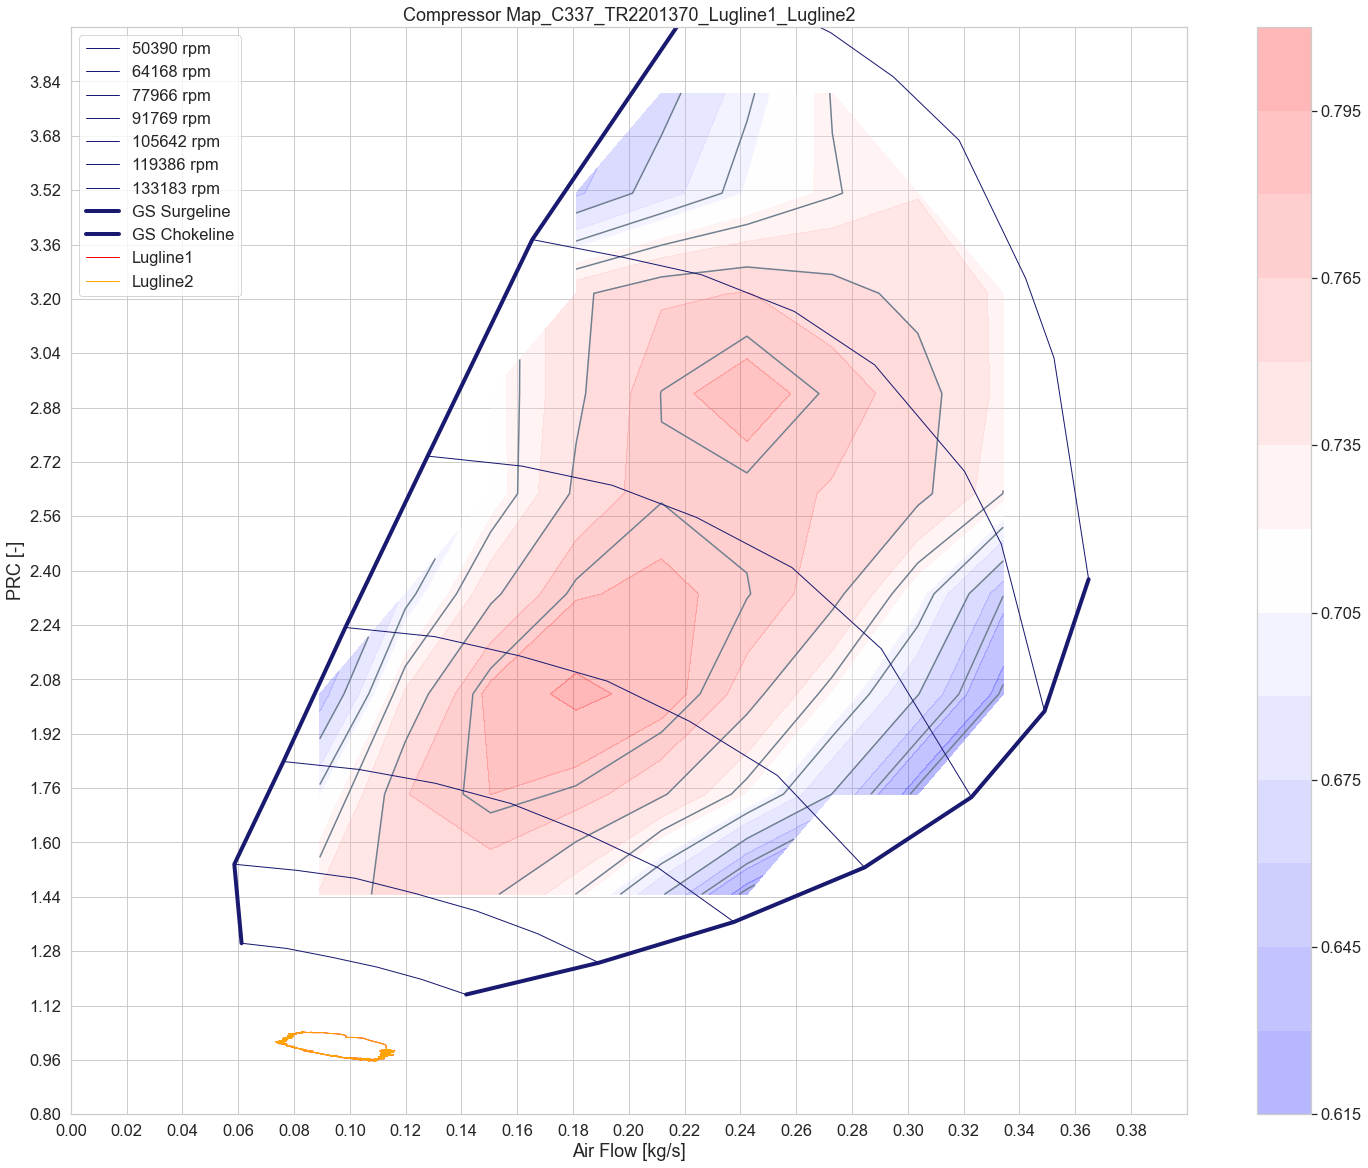

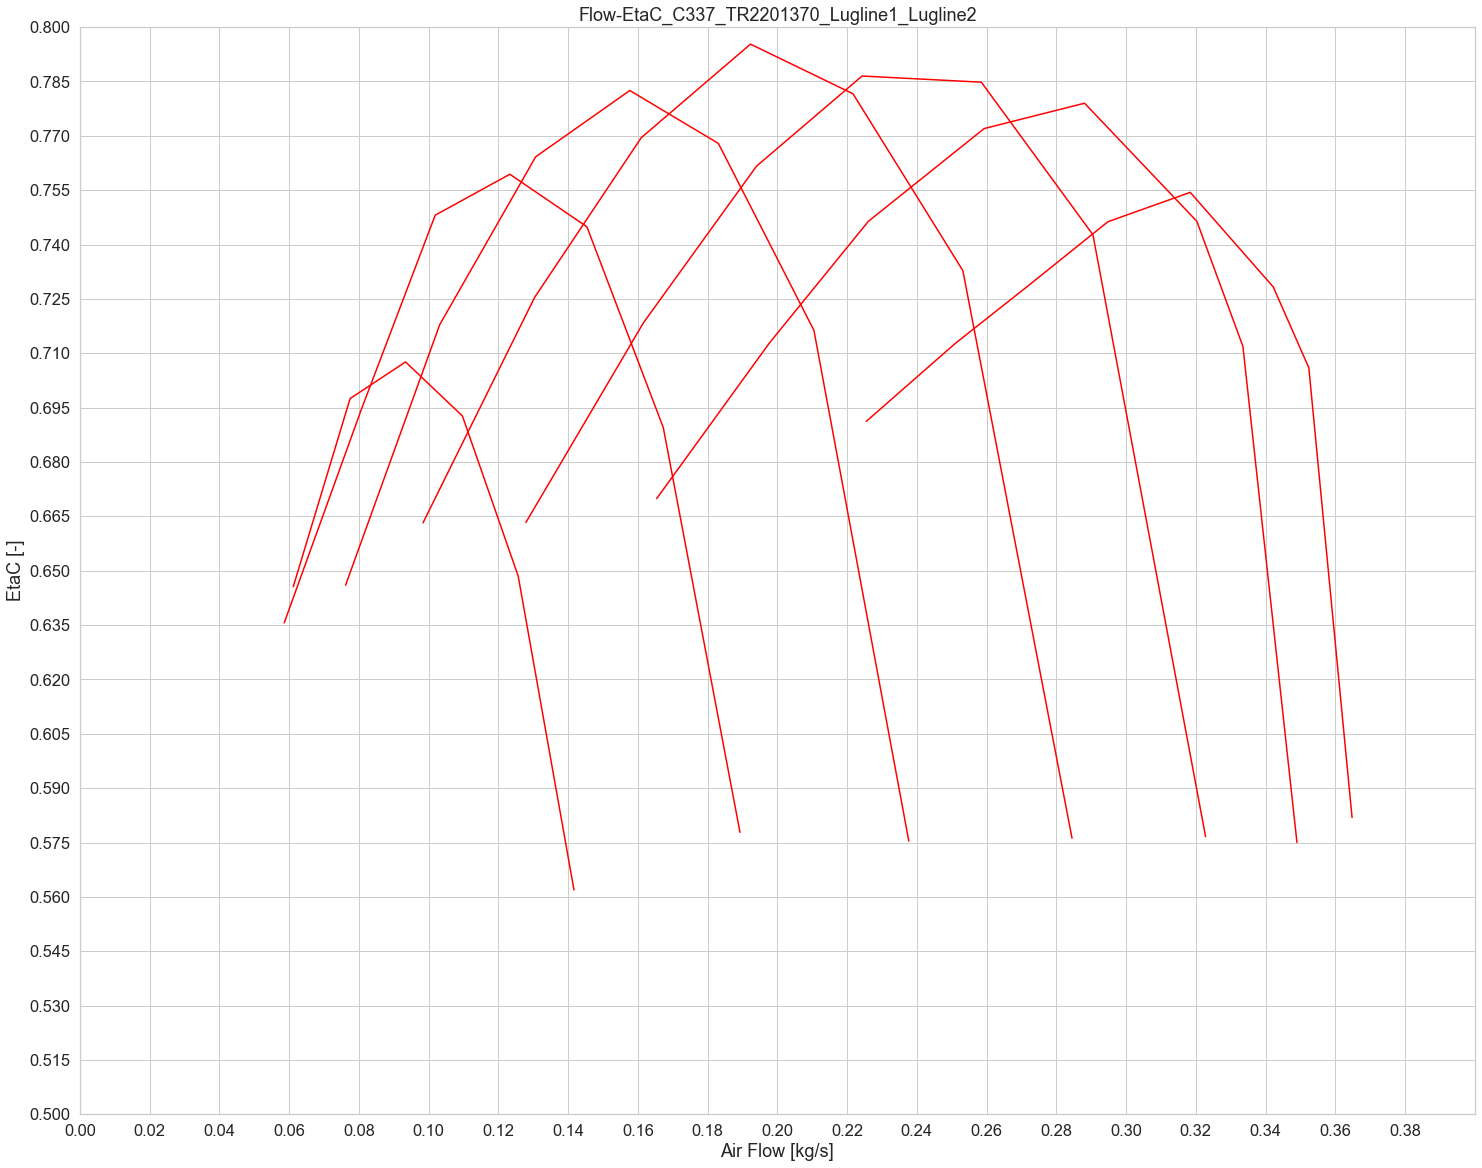

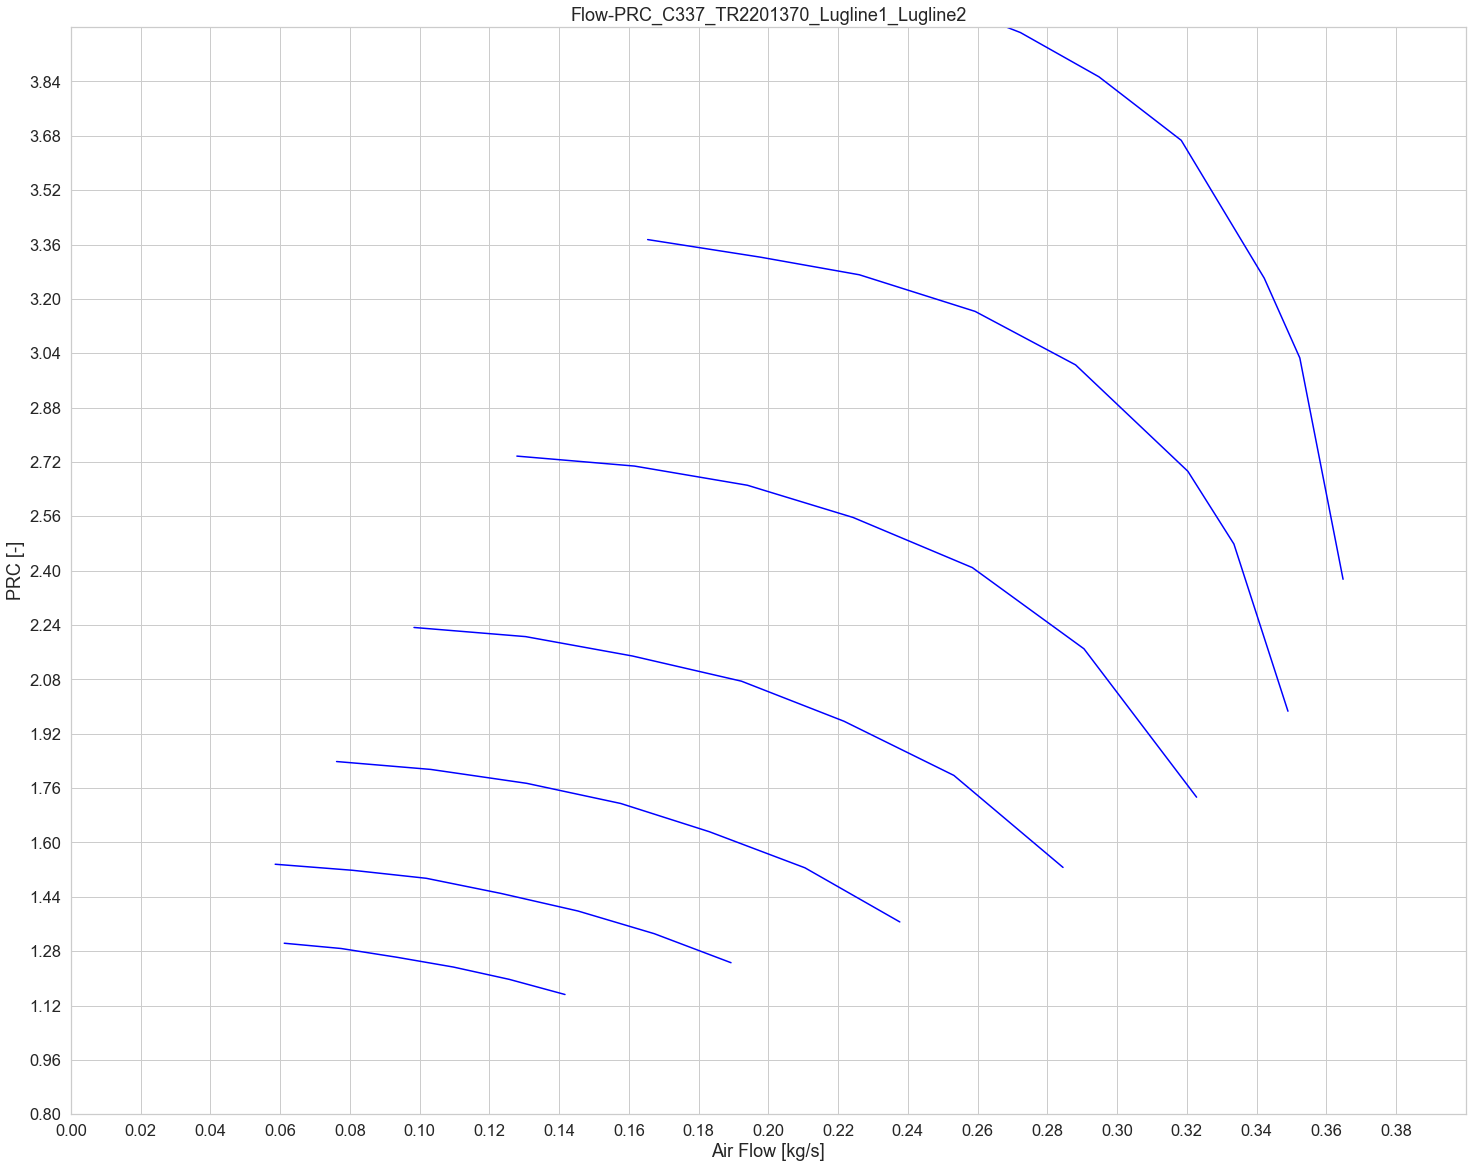

In [6]:
#specify data names
cmapname = "C337_TR2201370"
name1 = "Lugline1" #.csv file for 1st data set
name2 = "Lugline2" #.csv file for 2nd data set
color1 = "red" #plotting color for 1st data set
color2 = "orange" #plotting color for 2nd data set

all_datas_plot(map_array(cmapname),csv_df(name1),csv_df(name2),color1, color2, 0.4,0.8,4.0) #Syntax: map name, 1st dataset, 2nd dataset, color1, color2, xrange(air flow), yrange(PRCmin, PRCmax)


